In [ ]:
import os
from tempfile import tempdir
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms
import corems.lc_icpms_ftms.calc.lc_icrms_helpers as lcmsfns

import importlib
importlib.reload(icrms)


dir='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/lowmz-r1/'
flist=os.listdir(dir)
os.chdir(dir)


In [ ]:
# reload modules 
importlib.reload(icrms)
importlib.reload(lcmsfns)

In [106]:
# set fname

fname = 'spring-CHON3Ca_22-12-20.csv'

In [107]:
# get parsers

MSfiles={}

for f in flist:
    if ('.raw' in f) & ('_rep2' not in f):
        print(f)
        parser = rawFileReader.ImportMassSpectraThermoMSFileReader(f)
        MSfiles[f]={'parser': parser}

data = icrms.lc_icr_assign(dir)

data.master_data_holder = MSfiles

data._raw_filelist = data.master_data_holder.keys()

20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw


In [108]:
# set assignment parameters
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.25
MSParameters.molecular_search.max_ppm_error = 0.25

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"

MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,3)
#MSParameters.molecular_search.usedAtoms['Cu'] = (0,0)
#MSParameters.molecular_search.usedAtoms['Fe'] = (0,0)
MSParameters.molecular_search.usedAtoms['S'] = (0,0)
MSParameters.molecular_search.usedAtoms['P'] = (0,0)
#MSParameters.molecular_search.usedAtoms['Al'] = (0,0)
#MSParameters.molecular_search.usedAtoms['Si'] = (0,0)
MSParameters.molecular_search.usedAtoms['Ca'] = (0,1)




In [109]:
# run assignment algorithm
timerange = [4,22]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

data.assign_formula(interval = interval, timerange = timerange, refmasslist = refmasslist, calorder =2)

data_df = data.complete_results_df



20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
1 of 7 files
timestart: 4
MS Obj loaded - 1268 peaks found.
MS Obj loaded - 1268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
34 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.027 ppm
minimize function performed 174 fn evals and 2 iterations


100%|██████████| 80/80 [00:00<00:00, 1148.27it/s]

Started database insert using 2075 iterations for a total of 103740 rows



2075it [00:03, 633.70it/s]


'runworker'  3518.05 ms


Loading molecular formula database: 133878it [00:04, 31297.44it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 142.95it/s]


'run_molecular_formula'  8964.72 ms
487 assigned peaks and 781 unassigned peaks, total  = 38.41 %, relative abundance = 34.78 %, RMS error (best candidate) (ppm) = 0.068
timestart: 6
MS Obj loaded - 2128 peaks found.
MS Obj loaded - 2128 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
62 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 326 fn evals and 4 iterations
'runworker'  5.52 ms


Loading molecular formula database: 133878it [00:04, 32680.06it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 83.70it/s]


'run_molecular_formula'  6062.15 ms
1162 assigned peaks and 966 unassigned peaks, total  = 54.61 %, relative abundance = 55.54 %, RMS error (best candidate) (ppm) = 0.073
timestart: 8
MS Obj loaded - 2816 peaks found.
MS Obj loaded - 2816 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
87 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 273 fn evals and 3 iterations
'runworker'  6.35 ms


Loading molecular formula database: 133878it [00:04, 31257.99it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:18<00:00,  8.69it/s]


'run_molecular_formula'  22728.27 ms
1652 assigned peaks and 1164 unassigned peaks, total  = 58.66 %, relative abundance = 64.03 %, RMS error (best candidate) (ppm) = 0.074
timestart: 10
MS Obj loaded - 3077 peaks found.
MS Obj loaded - 3077 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  5.21 ms


Loading molecular formula database: 133878it [00:04, 31906.57it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:27<00:00,  1.84it/s]


'run_molecular_formula'  91355.69 ms
1917 assigned peaks and 1160 unassigned peaks, total  = 62.30 %, relative abundance = 67.94 %, RMS error (best candidate) (ppm) = 0.072
timestart: 12
MS Obj loaded - 3549 peaks found.
MS Obj loaded - 3549 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
143 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  5.35 ms


Loading molecular formula database: 133878it [00:04, 31920.22it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:37<00:00,  1.64it/s]


'run_molecular_formula'  101658.13 ms
2266 assigned peaks and 1283 unassigned peaks, total  = 63.85 %, relative abundance = 71.83 %, RMS error (best candidate) (ppm) = 0.071
timestart: 14
MS Obj loaded - 3768 peaks found.
MS Obj loaded - 3768 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
153 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 363 fn evals and 7 iterations
'runworker'  5.53 ms


Loading molecular formula database: 133878it [00:04, 31568.03it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:06<00:00,  2.40it/s]


'run_molecular_formula'  70823.86 ms
2504 assigned peaks and 1264 unassigned peaks, total  = 66.45 %, relative abundance = 76.45 %, RMS error (best candidate) (ppm) = 0.072
timestart: 16
MS Obj loaded - 3452 peaks found.
MS Obj loaded - 3452 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
162 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 360 fn evals and 7 iterations
'runworker'  5.30 ms


Loading molecular formula database: 133878it [00:04, 30687.03it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:03<00:00, 49.64it/s]


'run_molecular_formula'  7640.42 ms
2363 assigned peaks and 1089 unassigned peaks, total  = 68.45 %, relative abundance = 78.95 %, RMS error (best candidate) (ppm) = 0.070
timestart: 18
MS Obj loaded - 3759 peaks found.
MS Obj loaded - 3759 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
166 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  5.39 ms


Loading molecular formula database: 133878it [00:04, 31554.04it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:07<00:00, 20.49it/s]


'run_molecular_formula'  12090.56 ms
2593 assigned peaks and 1166 unassigned peaks, total  = 68.98 %, relative abundance = 81.20 %, RMS error (best candidate) (ppm) = 0.067
timestart: 20
MS Obj loaded - 3919 peaks found.
MS Obj loaded - 3919 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
167 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  5.21 ms


Loading molecular formula database: 133878it [00:04, 28771.40it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:27<00:00,  5.89it/s]


'run_molecular_formula'  31849.72 ms
2742 assigned peaks and 1177 unassigned peaks, total  = 69.97 %, relative abundance = 82.98 %, RMS error (best candidate) (ppm) = 0.070


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
2 of 7 files
timestart: 4
MS Obj loaded - 1634 peaks found.
MS Obj loaded - 1634 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
77 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.024 ppm
minimize function performed 350 fn evals and 7 iterations
'runworker'  5.49 ms


Loading molecular formula database: 133878it [00:04, 27832.94it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:31<00:00,  5.10it/s]


'run_molecular_formula'  36255.88 ms
736 assigned peaks and 898 unassigned peaks, total  = 45.04 %, relative abundance = 40.77 %, RMS error (best candidate) (ppm) = 0.060
timestart: 6
MS Obj loaded - 2758 peaks found.
MS Obj loaded - 2758 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 352 fn evals and 4 iterations
'runworker'  5.01 ms


Loading molecular formula database: 133878it [00:05, 26234.80it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:03<00:00,  2.53it/s]


'run_molecular_formula'  68398.73 ms
1627 assigned peaks and 1131 unassigned peaks, total  = 58.99 %, relative abundance = 60.41 %, RMS error (best candidate) (ppm) = 0.068
timestart: 8
MS Obj loaded - 3769 peaks found.
MS Obj loaded - 3769 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
156 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  5.23 ms


Loading molecular formula database: 133878it [00:05, 22792.78it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:33<00:00,  1.71it/s]


'run_molecular_formula'  99512.78 ms
2202 assigned peaks and 1567 unassigned peaks, total  = 58.42 %, relative abundance = 63.82 %, RMS error (best candidate) (ppm) = 0.068
timestart: 10
MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
195 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 321 fn evals and 6 iterations
'runworker'  5.04 ms


Loading molecular formula database: 133878it [00:05, 24132.44it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:57<00:00,  1.36it/s]


'run_molecular_formula'  122975.19 ms
2556 assigned peaks and 1447 unassigned peaks, total  = 63.85 %, relative abundance = 71.41 %, RMS error (best candidate) (ppm) = 0.073
timestart: 12
MS Obj loaded - 4329 peaks found.
MS Obj loaded - 4329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
226 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  5.47 ms


Loading molecular formula database: 133878it [00:06, 21824.94it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [02:13<00:00,  1.20it/s]


'run_molecular_formula'  139506.97 ms
2862 assigned peaks and 1467 unassigned peaks, total  = 66.11 %, relative abundance = 74.99 %, RMS error (best candidate) (ppm) = 0.072
timestart: 14
MS Obj loaded - 4619 peaks found.
MS Obj loaded - 4619 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
246 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  5.07 ms


Loading molecular formula database: 133878it [00:06, 22302.11it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [02:18<00:00,  1.16it/s]


'run_molecular_formula'  144123.20 ms
3156 assigned peaks and 1463 unassigned peaks, total  = 68.33 %, relative abundance = 78.82 %, RMS error (best candidate) (ppm) = 0.073
timestart: 16
MS Obj loaded - 4899 peaks found.
MS Obj loaded - 4899 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
257 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 3020 fn evals and 69 iterations
'runworker'  5.42 ms


Loading molecular formula database: 133878it [00:06, 21538.99it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [02:49<00:00,  1.06s/it]


'run_molecular_formula'  175767.83 ms
3322 assigned peaks and 1577 unassigned peaks, total  = 67.81 %, relative abundance = 80.60 %, RMS error (best candidate) (ppm) = 0.076
timestart: 18
MS Obj loaded - 5289 peaks found.
MS Obj loaded - 5289 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
268 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 470 fn evals and 10 iterations
'runworker'  5.09 ms


Loading molecular formula database: 133878it [00:06, 22263.48it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [03:08<00:00,  1.18s/it]


'run_molecular_formula'  194635.42 ms
3648 assigned peaks and 1641 unassigned peaks, total  = 68.97 %, relative abundance = 81.91 %, RMS error (best candidate) (ppm) = 0.089
timestart: 20
MS Obj loaded - 5527 peaks found.
MS Obj loaded - 5527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
262 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3029 fn evals and 71 iterations
'runworker'  4.95 ms


Loading molecular formula database: 133878it [00:06, 22172.96it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [03:41<00:00,  1.39s/it]


'run_molecular_formula'  227766.16 ms
3883 assigned peaks and 1644 unassigned peaks, total  = 70.26 %, relative abundance = 82.44 %, RMS error (best candidate) (ppm) = 0.082


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
3 of 7 files
timestart: 4
MS Obj loaded - 1155 peaks found.
MS Obj loaded - 1155 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
32 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 265 fn evals and 3 iterations
'runworker'  4.94 ms


Loading molecular formula database: 133878it [00:03, 38290.09it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 171.49it/s]


'run_molecular_formula'  4461.09 ms
508 assigned peaks and 647 unassigned peaks, total  = 43.98 %, relative abundance = 41.47 %, RMS error (best candidate) (ppm) = 0.069
timestart: 6
MS Obj loaded - 1591 peaks found.
MS Obj loaded - 1591 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
52 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 260 fn evals and 3 iterations
'runworker'  4.97 ms


Loading molecular formula database: 133878it [00:03, 35543.14it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 126.08it/s]


'run_molecular_formula'  5066.96 ms
881 assigned peaks and 710 unassigned peaks, total  = 55.37 %, relative abundance = 58.24 %, RMS error (best candidate) (ppm) = 0.067
timestart: 8
MS Obj loaded - 1981 peaks found.
MS Obj loaded - 1981 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
75 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 257 fn evals and 3 iterations
'runworker'  5.06 ms


Loading molecular formula database: 133878it [00:03, 38379.35it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:09<00:00, 16.02it/s]


'run_molecular_formula'  13501.11 ms
1151 assigned peaks and 830 unassigned peaks, total  = 58.10 %, relative abundance = 65.13 %, RMS error (best candidate) (ppm) = 0.069
timestart: 10
MS Obj loaded - 2115 peaks found.
MS Obj loaded - 2115 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
86 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  4.98 ms


Loading molecular formula database: 133878it [00:03, 38874.04it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:35<00:00,  4.46it/s]


'run_molecular_formula'  39356.13 ms
1301 assigned peaks and 814 unassigned peaks, total  = 61.51 %, relative abundance = 68.43 %, RMS error (best candidate) (ppm) = 0.067
timestart: 12
MS Obj loaded - 2461 peaks found.
MS Obj loaded - 2461 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
101 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 367 fn evals and 7 iterations
'runworker'  5.01 ms


Loading molecular formula database: 133878it [00:03, 37129.93it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:37<00:00,  4.23it/s]


'run_molecular_formula'  41439.85 ms
1523 assigned peaks and 938 unassigned peaks, total  = 61.89 %, relative abundance = 72.92 %, RMS error (best candidate) (ppm) = 0.069
timestart: 14
MS Obj loaded - 2508 peaks found.
MS Obj loaded - 2508 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  5.31 ms


Loading molecular formula database: 133878it [00:03, 37008.52it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:36<00:00,  4.33it/s]


'run_molecular_formula'  40622.45 ms
1620 assigned peaks and 888 unassigned peaks, total  = 64.59 %, relative abundance = 77.16 %, RMS error (best candidate) (ppm) = 0.066
timestart: 16
MS Obj loaded - 2527 peaks found.
MS Obj loaded - 2527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 371 fn evals and 7 iterations
'runworker'  5.05 ms


Loading molecular formula database: 133878it [00:03, 35257.47it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:33<00:00,  4.73it/s]


'run_molecular_formula'  37672.41 ms
1657 assigned peaks and 870 unassigned peaks, total  = 65.57 %, relative abundance = 79.34 %, RMS error (best candidate) (ppm) = 0.068
timestart: 18
MS Obj loaded - 2598 peaks found.
MS Obj loaded - 2598 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  5.10 ms


Loading molecular formula database: 133878it [00:03, 35914.98it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:33<00:00,  4.76it/s]


'run_molecular_formula'  37399.29 ms
1737 assigned peaks and 861 unassigned peaks, total  = 66.86 %, relative abundance = 82.01 %, RMS error (best candidate) (ppm) = 0.066
timestart: 20
MS Obj loaded - 2489 peaks found.
MS Obj loaded - 2489 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.93 ms


Loading molecular formula database: 133878it [00:03, 36392.79it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:29<00:00,  5.41it/s]


'run_molecular_formula'  33257.12 ms
1716 assigned peaks and 773 unassigned peaks, total  = 68.94 %, relative abundance = 83.90 %, RMS error (best candidate) (ppm) = 0.069


20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
4 of 7 files
timestart: 4
MS Obj loaded - 622 peaks found.
MS Obj loaded - 622 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.035 ppm
minimize function performed 259 fn evals and 3 iterations
'runworker'  4.93 ms


Loading molecular formula database: 133878it [00:03, 37711.07it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 255.98it/s]


'run_molecular_formula'  4211.75 ms
239 assigned peaks and 383 unassigned peaks, total  = 38.42 %, relative abundance = 30.53 %, RMS error (best candidate) (ppm) = 0.111
timestart: 6
MS Obj loaded - 876 peaks found.
MS Obj loaded - 876 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
12 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 271 fn evals and 3 iterations
'runworker'  4.93 ms


Loading molecular formula database: 133878it [00:03, 35677.49it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 186.57it/s]


'run_molecular_formula'  4646.44 ms
482 assigned peaks and 394 unassigned peaks, total  = 55.02 %, relative abundance = 54.89 %, RMS error (best candidate) (ppm) = 0.073
timestart: 8
MS Obj loaded - 1139 peaks found.
MS Obj loaded - 1139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 263 fn evals and 3 iterations
'runworker'  4.93 ms


Loading molecular formula database: 133878it [00:03, 39748.41it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 147.19it/s]


'run_molecular_formula'  4491.82 ms
682 assigned peaks and 457 unassigned peaks, total  = 59.88 %, relative abundance = 62.78 %, RMS error (best candidate) (ppm) = 0.078
timestart: 10
MS Obj loaded - 1323 peaks found.
MS Obj loaded - 1323 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
36 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 842 fn evals and 12 iterations
'runworker'  5.28 ms


Loading molecular formula database: 133878it [00:03, 40609.50it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 126.33it/s]


'run_molecular_formula'  4600.38 ms
854 assigned peaks and 469 unassigned peaks, total  = 64.55 %, relative abundance = 68.22 %, RMS error (best candidate) (ppm) = 0.074
timestart: 12
MS Obj loaded - 1572 peaks found.
MS Obj loaded - 1572 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
43 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 680 fn evals and 10 iterations
'runworker'  4.92 ms


Loading molecular formula database: 133878it [00:03, 38842.67it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [01:02<00:00,  2.55it/s]


'run_molecular_formula'  66137.00 ms
1036 assigned peaks and 536 unassigned peaks, total  = 65.90 %, relative abundance = 69.17 %, RMS error (best candidate) (ppm) = 0.072
timestart: 14
MS Obj loaded - 1751 peaks found.
MS Obj loaded - 1751 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
47 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 727 fn evals and 10 iterations
'runworker'  4.90 ms


Loading molecular formula database: 133878it [00:03, 36156.05it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 90.80it/s] 


'run_molecular_formula'  5503.12 ms
1179 assigned peaks and 572 unassigned peaks, total  = 67.33 %, relative abundance = 74.57 %, RMS error (best candidate) (ppm) = 0.072
timestart: 16
MS Obj loaded - 1781 peaks found.
MS Obj loaded - 1781 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
51 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 379 fn evals and 7 iterations
'runworker'  5.68 ms


Loading molecular formula database: 133878it [00:03, 37189.50it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 91.02it/s]


'run_molecular_formula'  5395.88 ms
1246 assigned peaks and 535 unassigned peaks, total  = 69.96 %, relative abundance = 77.17 %, RMS error (best candidate) (ppm) = 0.075
timestart: 18
MS Obj loaded - 1779 peaks found.
MS Obj loaded - 1779 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  5.37 ms


Loading molecular formula database: 133878it [00:03, 37943.03it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 89.61it/s]


'run_molecular_formula'  5351.81 ms
1258 assigned peaks and 521 unassigned peaks, total  = 70.71 %, relative abundance = 78.50 %, RMS error (best candidate) (ppm) = 0.074
timestart: 20
MS Obj loaded - 1815 peaks found.
MS Obj loaded - 1815 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.97 ms


Loading molecular formula database: 133878it [00:03, 36101.54it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 83.89it/s]


'run_molecular_formula'  5653.33 ms
1282 assigned peaks and 533 unassigned peaks, total  = 70.63 %, relative abundance = 79.79 %, RMS error (best candidate) (ppm) = 0.073


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
5 of 7 files
timestart: 4
MS Obj loaded - 163 peaks found.
MS Obj loaded - 163 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.56 ms


Loading molecular formula database: 133878it [00:03, 41114.20it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 470.79it/s]


'run_molecular_formula'  3628.80 ms
6 assigned peaks and 157 unassigned peaks, total  = 3.68 %, relative abundance = 6.02 %, RMS error (best candidate) (ppm) = 0.206
timestart: 6
MS Obj loaded - 149 peaks found.
MS Obj loaded - 149 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.42 ms


Loading molecular formula database: 133878it [00:03, 39679.45it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 492.59it/s]


'run_molecular_formula'  3723.71 ms
7 assigned peaks and 142 unassigned peaks, total  = 4.70 %, relative abundance = 6.47 %, RMS error (best candidate) (ppm) = 0.156
timestart: 8
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.41 ms


Loading molecular formula database: 133878it [00:03, 40296.03it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 607.14it/s]


'run_molecular_formula'  3612.62 ms
5 assigned peaks and 185 unassigned peaks, total  = 2.63 %, relative abundance = 0.39 %, RMS error (best candidate) (ppm) = 0.182
timestart: 10
MS Obj loaded - 222 peaks found.
MS Obj loaded - 222 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.37 ms


Loading molecular formula database: 133878it [00:03, 35895.17it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 339.22it/s]


'run_molecular_formula'  4228.65 ms
10 assigned peaks and 212 unassigned peaks, total  = 4.50 %, relative abundance = 6.45 %, RMS error (best candidate) (ppm) = 0.155
timestart: 12
MS Obj loaded - 268 peaks found.
MS Obj loaded - 268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.27 ms


Loading molecular formula database: 133878it [00:03, 38758.07it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 280.11it/s]


'run_molecular_formula'  4053.38 ms
22 assigned peaks and 246 unassigned peaks, total  = 8.21 %, relative abundance = 6.80 %, RMS error (best candidate) (ppm) = 0.134
timestart: 14
MS Obj loaded - 400 peaks found.
MS Obj loaded - 400 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.39 ms


Loading molecular formula database: 133878it [00:03, 39865.01it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 164.77it/s]


'run_molecular_formula'  4364.65 ms
50 assigned peaks and 350 unassigned peaks, total  = 12.50 %, relative abundance = 8.29 %, RMS error (best candidate) (ppm) = 0.134
timestart: 16
MS Obj loaded - 430 peaks found.
MS Obj loaded - 430 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 1206 fn evals and 16 iterations
'runworker'  5.31 ms


Loading molecular formula database: 133878it [00:03, 38300.16it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 87.44it/s]


'run_molecular_formula'  5349.93 ms
182 assigned peaks and 248 unassigned peaks, total  = 42.33 %, relative abundance = 26.39 %, RMS error (best candidate) (ppm) = 0.111
timestart: 18
MS Obj loaded - 506 peaks found.
MS Obj loaded - 506 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 589 fn evals and 8 iterations
'runworker'  5.19 ms


Loading molecular formula database: 133878it [00:03, 36440.50it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 95.37it/s]


'run_molecular_formula'  5382.18 ms
220 assigned peaks and 286 unassigned peaks, total  = 43.48 %, relative abundance = 26.63 %, RMS error (best candidate) (ppm) = 0.109
timestart: 20
MS Obj loaded - 445 peaks found.
MS Obj loaded - 445 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
8 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 577 fn evals and 8 iterations
'runworker'  5.39 ms


Loading molecular formula database: 133878it [00:03, 35901.06it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 97.13it/s]


'run_molecular_formula'  5406.87 ms
223 assigned peaks and 222 unassigned peaks, total  = 50.11 %, relative abundance = 31.71 %, RMS error (best candidate) (ppm) = 0.089


20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
6 of 7 files
timestart: 4
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.50 ms


Loading molecular formula database: 133878it [00:03, 41725.68it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 449.86it/s]


'run_molecular_formula'  3592.10 ms
8 assigned peaks and 86 unassigned peaks, total  = 8.51 %, relative abundance = 3.76 %, RMS error (best candidate) (ppm) = 0.083
timestart: 6
MS Obj loaded - 83 peaks found.
MS Obj loaded - 83 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.56 ms


Loading molecular formula database: 133878it [00:03, 40115.59it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 459.92it/s]


'run_molecular_formula'  3712.77 ms
6 assigned peaks and 77 unassigned peaks, total  = 7.23 %, relative abundance = 3.48 %, RMS error (best candidate) (ppm) = 0.064
timestart: 8
MS Obj loaded - 92 peaks found.
MS Obj loaded - 92 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.55 ms


Loading molecular formula database: 133878it [00:03, 42058.97it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 639.12it/s]


'run_molecular_formula'  3461.05 ms
5 assigned peaks and 87 unassigned peaks, total  = 5.43 %, relative abundance = 3.33 %, RMS error (best candidate) (ppm) = 0.143
timestart: 10
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.13 ms


Loading molecular formula database: 133878it [00:03, 43644.61it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 624.46it/s]


'run_molecular_formula'  3351.35 ms
7 assigned peaks and 87 unassigned peaks, total  = 7.45 %, relative abundance = 3.55 %, RMS error (best candidate) (ppm) = 0.203
timestart: 12
MS Obj loaded - 119 peaks found.
MS Obj loaded - 119 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.25 ms


Loading molecular formula database: 133878it [00:03, 42332.59it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 664.06it/s] 


'run_molecular_formula'  3433.27 ms
5 assigned peaks and 114 unassigned peaks, total  = 4.20 %, relative abundance = 2.76 %, RMS error (best candidate) (ppm) = 0.196
timestart: 14
MS Obj loaded - 174 peaks found.
MS Obj loaded - 174 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.24 ms


Loading molecular formula database: 133878it [00:03, 38225.03it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 516.25it/s]


'run_molecular_formula'  3843.90 ms
5 assigned peaks and 169 unassigned peaks, total  = 2.87 %, relative abundance = 0.84 %, RMS error (best candidate) (ppm) = 0.146
timestart: 16
MS Obj loaded - 234 peaks found.
MS Obj loaded - 234 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.19 ms


Loading molecular formula database: 133878it [00:03, 36065.95it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 485.54it/s]


'run_molecular_formula'  4074.40 ms
4 assigned peaks and 230 unassigned peaks, total  = 1.71 %, relative abundance = 0.58 %, RMS error (best candidate) (ppm) = 0.164
timestart: 18
MS Obj loaded - 244 peaks found.
MS Obj loaded - 244 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.51 ms


Loading molecular formula database: 133878it [00:03, 39870.95it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 391.62it/s]


'run_molecular_formula'  3800.76 ms
6 assigned peaks and 238 unassigned peaks, total  = 2.46 %, relative abundance = 0.44 %, RMS error (best candidate) (ppm) = 0.158
timestart: 20
MS Obj loaded - 197 peaks found.
MS Obj loaded - 197 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.87 ms


Loading molecular formula database: 133878it [00:03, 37052.51it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 491.71it/s]


'run_molecular_formula'  3970.32 ms
5 assigned peaks and 192 unassigned peaks, total  = 2.54 %, relative abundance = 0.75 %, RMS error (best candidate) (ppm) = 0.098


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
7 of 7 files
timestart: 4
MS Obj loaded - 344 peaks found.
MS Obj loaded - 344 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.012 ppm
minimize function performed 390 fn evals and 7 iterations
'runworker'  6.04 ms


Loading molecular formula database: 133878it [00:03, 37063.32it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 234.84it/s]


'run_molecular_formula'  4340.59 ms
194 assigned peaks and 150 unassigned peaks, total  = 56.40 %, relative abundance = 30.40 %, RMS error (best candidate) (ppm) = 0.054
timestart: 6
MS Obj loaded - 406 peaks found.
MS Obj loaded - 406 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 395 fn evals and 7 iterations
'runworker'  5.26 ms


Loading molecular formula database: 133878it [00:03, 35506.49it/s] 
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 171.34it/s]


'run_molecular_formula'  4749.53 ms
238 assigned peaks and 168 unassigned peaks, total  = 58.62 %, relative abundance = 34.47 %, RMS error (best candidate) (ppm) = 0.051
timestart: 8
MS Obj loaded - 493 peaks found.
MS Obj loaded - 493 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 333 fn evals and 6 iterations
'runworker'  8.12 ms


Loading molecular formula database: 133878it [00:04, 33180.29it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 161.73it/s]


'run_molecular_formula'  5075.74 ms
294 assigned peaks and 199 unassigned peaks, total  = 59.63 %, relative abundance = 36.43 %, RMS error (best candidate) (ppm) = 0.044
timestart: 10
MS Obj loaded - 580 peaks found.
MS Obj loaded - 580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
18 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  5.18 ms


Loading molecular formula database: 133878it [00:03, 33473.27it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 183.78it/s]


'run_molecular_formula'  4918.73 ms
343 assigned peaks and 237 unassigned peaks, total  = 59.14 %, relative abundance = 38.42 %, RMS error (best candidate) (ppm) = 0.042
timestart: 12
MS Obj loaded - 571 peaks found.
MS Obj loaded - 571 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
19 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  5.13 ms


Loading molecular formula database: 133878it [00:04, 33285.50it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 180.07it/s]


'run_molecular_formula'  4959.07 ms
335 assigned peaks and 236 unassigned peaks, total  = 58.67 %, relative abundance = 39.27 %, RMS error (best candidate) (ppm) = 0.040
timestart: 14
MS Obj loaded - 646 peaks found.
MS Obj loaded - 646 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  5.60 ms


Loading molecular formula database: 133878it [00:03, 34216.47it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 186.07it/s]


'run_molecular_formula'  4831.66 ms
374 assigned peaks and 272 unassigned peaks, total  = 57.89 %, relative abundance = 39.65 %, RMS error (best candidate) (ppm) = 0.034
timestart: 16
MS Obj loaded - 681 peaks found.
MS Obj loaded - 681 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  5.25 ms


Loading molecular formula database: 133878it [00:04, 31823.96it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:00<00:00, 163.66it/s]


'run_molecular_formula'  5235.40 ms
416 assigned peaks and 265 unassigned peaks, total  = 61.09 %, relative abundance = 42.92 %, RMS error (best candidate) (ppm) = 0.045
timestart: 18
MS Obj loaded - 760 peaks found.
MS Obj loaded - 760 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
28 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  5.39 ms


Loading molecular formula database: 133878it [00:04, 33165.42it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 136.52it/s]


'run_molecular_formula'  5248.15 ms
454 assigned peaks and 306 unassigned peaks, total  = 59.74 %, relative abundance = 48.64 %, RMS error (best candidate) (ppm) = 0.077
timestart: 20
MS Obj loaded - 753 peaks found.
MS Obj loaded - 753 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.008 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.95 ms


Loading molecular formula database: 133878it [00:04, 33079.71it/s]
Started molecular formula search for class {"N": 3, "O": 20, "Ca": 1}, (de)protonated : 100%|██████████| 160/160 [00:01<00:00, 148.08it/s]


'run_molecular_formula'  5180.90 ms
476 assigned peaks and 277 unassigned peaks, total  = 63.21 %, relative abundance = 46.40 %, RMS error (best candidate) (ppm) = 0.053


In [110]:
# add 'm/z window' and 'rep' columns

data_df = lcmsfns.add_mzwindow_col(data_df)

data_df = lcmsfns.addRepCol(data_df)

print(data_df['m/z window'].unique())
print(data_df['Rep'].unique())
print(data_df['file'].unique())
print(data_df['m/z Window Size'].unique())


20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw
20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
[1]
['400-600 m/z' '200-1200 m/z' '400-500 m/z' '500-600 m/z']
[1]
['20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw']
['200 m/z' '1000 m/z' '100 m/z']


In [111]:
# assign molecule classes 
# 

importlib.reload(icrms)
importlib.reload(lcmsfns)

heter = ['N', 'Ca']

molclasses = lcmsfns.get_mol_classes(heter)

print(molclasses)

data_df = lcmsfns.assign_mol_class(data_df,molclasses)

print('Molecule classes: ', data_df['mol_class'].unique() )


['CHO', 'CHON', 'CHONCa', 'CHOCa']
['C', 'H', 'O', 'N', 'C', 'Ca']
hhhh
included:  ['C', 'H', 'O'] (1827, 37)
excluded:  ['N', 'Ca'] (362, 37)
included:  ['C', 'H', 'O', 'N'] (1434, 37)
excluded:  ['Ca'] (584, 37)
included:  ['C', 'H', 'O', 'N', 'C', 'Ca'] (850, 37)
excluded:  [] (850, 37)
included:  ['C', 'H', 'O', 'C', 'Ca'] (881, 37)
excluded:  ['N'] (31, 37)
included:  ['C', 'H', 'O'] (3861, 37)
excluded:  ['N', 'Ca'] (531, 37)
included:  ['C', 'H', 'O', 'N'] (3287, 37)
excluded:  ['Ca'] (1574, 37)
included:  ['C', 'H', 'O', 'N', 'C', 'Ca'] (1713, 37)
excluded:  [] (1713, 37)
included:  ['C', 'H', 'O', 'C', 'Ca'] (1756, 37)
excluded:  ['N'] (43, 37)
included:  ['C', 'H', 'O'] (5333, 37)
excluded:  ['N', 'Ca'] (603, 37)
included:  ['C', 'H', 'O', 'N'] (4666, 37)
excluded:  ['Ca'] (2102, 37)
included:  ['C', 'H', 'O', 'N', 'C', 'Ca'] (2564, 37)
excluded:  [] (2564, 37)
included:  ['C', 'H', 'O', 'C', 'Ca'] (2628, 37)
excluded:  ['N'] (64, 37)
included:  ['C', 'H', 'O'] (6219, 37)
exc

In [112]:
# create 200 m/z blank entries from 100 m/z blank data (200 m/z blank data were not measured) & add them to master df

raw_filelist = data_df['file'].unique()

blank_files = [f for f in raw_filelist if 'qh2o' in f]

blank_data = []

for f in blank_files:

    if 'fullmz' not in f:
        
        temp = data_df[data_df['file'] == f] 

        blank_data.append(temp)

blanks_df = pd.concat(blank_data)  # these are only 100 m/z blanks (200 m/z blanks were not collected)

rep1_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
rep1_temp = rep1_temp[rep1_temp['m/z'] <= 600]
rep1_temp['file'] = 'mz200_400_600_blnk'
rep1_temp['m/z window'] = '400-600 m/z'

blanks_df = pd.concat([blanks_df,rep1_temp])

#rep1_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
#rep1_temp = rep1_temp[rep1_temp['m/z'] >= 600]
#rep1_temp['file'] = 'mz200_600_800_blnk'
#rep1_temp['m/z window'] = '600-800 m/z'

#blanks_df = pd.concat([blanks_df,rep1_temp])


rep2_temp = blanks_df[blanks_df['file'].str.contains('rep2')]
rep2_temp = rep2_temp[rep2_temp['m/z'] <= 600]
rep2_temp['file'] = 'mz200_400_600_blnk_rep2'
rep2_temp['m/z window'] = '400-600 m/z'

blanks_df = pd.concat([blanks_df,rep2_temp])

#rep2_temp = blanks_df[~blanks_df['file'].str.contains('rep2')]
#rep2_temp = rep2_temp[rep2_temp['m/z'] >= 600]
#rep2_temp['file'] = 'mz200_600_800_blnk_rep2'
#rep2_temp['m/z window'] = '600-800 m/z'

#blanks_df = pd.concat([blanks_df,rep2_temp])

print(blanks_df['file'].unique())

print(blanks_df['m/z window'].unique())


['20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw' 'mz200_400_600_blnk']
['400-500 m/z' '500-600 m/z' '400-600 m/z']


In [113]:
# add 200 m/z blank data and fullmz blank data to blanks df & add column with blank file identity to use in blank subtraction

mz200_blanks = blanks_df[blanks_df['m/z window'] == '400-600 m/z']
data_df = pd.concat([data_df, mz200_blanks])

blanks_df = pd.concat([blanks_df, data_df[data_df['file'] =='20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_rep2.raw' ]])
blanks_df = pd.concat([blanks_df, data_df[data_df['file'] =='20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw' ]])

print(blanks_df['m/z window'].unique())

data_df['blank file'] = data_df.index

for window in data_df['m/z window'].unique():

    temp1 = data_df[data_df['m/z window'] == window] # all features collected in given m/z window       
    btemp1 = blanks_df[blanks_df['m/z window'] == window] # all blank feautres collected in same m/z window
    print(temp1['Rep'].unique())
    for r in temp1['Rep'].unique():
        temp2 = temp1[temp1['Rep'] == r]
        btemp2 = btemp1[btemp1['Rep'] == r]

        print(np.shape( btemp2['file']))

        temp2['blank file'] = btemp2['file'].iloc[0]
        print(np.shape( btemp2['file']))
        data_df[(data_df['m/z window'] == window) & (data_df['Rep'] == r)]  = temp2


print(data_df['blank file'].unique())


['400-500 m/z' '500-600 m/z' '400-600 m/z' '200-1200 m/z']
[1]
(530,)
(530,)
[1]
(2140,)
(2140,)
[1]
(492,)
(492,)
[1]
(38,)
(38,)
['mz200_400_600_blnk' '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'
 '20221103_LBA_Boiteau_Zorbax3p5_qh2o_500_600.raw']


In [114]:
# save assignment results as pd dataframe and export as .csv 
data_df.to_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/"+fname)


In [115]:
#-#-#-# read assignment results from .csv
data_df = pd.read_csv("/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/"+fname)

In [116]:
# create subsets of assignments based m/z window

list100mz = []
list200mz = []
listfullzmz = [] 

for mzwindow in data_df['m/z window'].unique():

    r_df = data_df[data_df['m/z window'] == mzwindow]

    if (mzwindow == '400-600 m/z') or (mzwindow == '600-800 m/z'):
        list200mz.append(r_df)

    if (mzwindow == '400-500 m/z') or (mzwindow == '500-600 m/z') or (mzwindow == '600-700 m/z') or (mzwindow == '700-800 m/z'):
        list100mz.append(r_df) 

    elif (mzwindow == '200-1200 m/z'):
        listfullzmz.append(r_df) 

mz100 = pd.concat(list100mz)
mz200 = pd.concat(list200mz)
mzfull = pd.concat(listfullzmz)


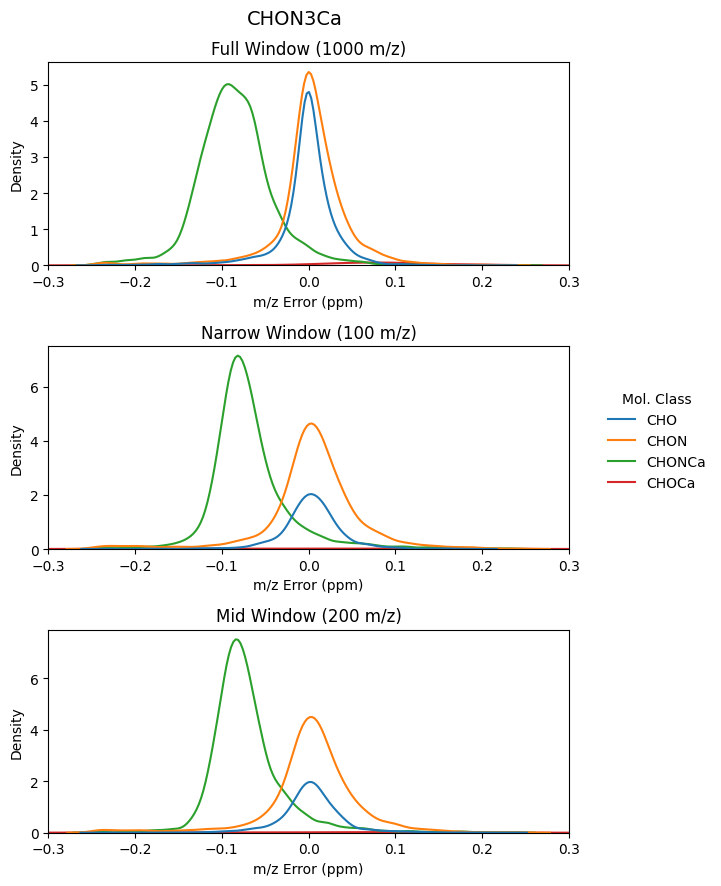

In [117]:
# plot assignment error kernel density

ttt = 'CHON3Ca'  ## title for main plot

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (6,9))
sns.kdeplot(data=mzfull[mzfull['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax1)
ax1.set_xlim(-0.3,0.3)
ax1.set_title( 'Full Window (1000 m/z)')
legend = ax1.get_legend()
handles = legend.legendHandles
labels = mzfull[mzfull['mol_class']!='Unassigned']['mol_class'].unique()
legend.remove()

sns.kdeplot(data=mz100[mz100['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax2, legend = False)
ax2.set_title( 'Narrow Window (100 m/z)')
ax2.set_xlim(-0.3,0.3)

sns.kdeplot(data=mz200[mz200['mol_class']!='Unassigned'], x="m/z Error (ppm)", hue="mol_class", ax = ax3, legend = False)
ax3.set_title( 'Mid Window (200 m/z)')
ax3.set_xlim(-0.3,0.3)


fig.suptitle(ttt, fontsize=14)
fig.legend(handles, labels, title='Mol. Class', frameon = False, bbox_to_anchor=(1.0,0.5), loc = 'center left')

plt.tight_layout()

plt.show()


In [118]:
# create subsets of assigned features 
assigned_100mz = mz100[~mz100['Molecular Formula'].isnull()]
assigned_200mz = mz200[~mz200['Molecular Formula'].isnull()]
assigned_fullmz = mzfull[~mzfull['Molecular Formula'].isnull()]

print('400-600 m/z, 100 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(mz100)[0],  np.shape(assigned_100mz)[0], np.shape(assigned_100mz)[0] / np.shape(mz100)[0] * 100))
print('\n400-600 m/z, 200 m/z windowing: \n%s features total; %s assigned (%.1f%%)' %(np.shape(mz200)[0], np.shape(assigned_200mz)[0], np.shape(assigned_200mz)[0] / np.shape(mz200)[0] * 100))
print('\n200-800 m/z window (full scan): \n%s features total; %s assigned (%.1f%%)' %(np.shape(mzfull)[0],np.shape(assigned_fullmz)[0],  np.shape(assigned_fullmz)[0] / np.shape(mzfull)[0] * 100))

400-600 m/z, 100 m/z windowing: 
18532 features total; 18532 assigned (100.0%)

400-600 m/z, 200 m/z windowing: 
16278 features total; 16278 assigned (100.0%)

200-800 m/z window (full scan): 
23806 features total; 23806 assigned (100.0%)


In [119]:
# create subsets of unique features 
print('400-600 m/z, 100 m/z windowing:')
unique_100mz = lcmsfns.getUniqueFeatures(assigned_100mz)

print('\n400-600 m/z, 200 m/z windowing:')
unique_200mz = lcmsfns.getUniqueFeatures(assigned_200mz)

print('\n200-800 m/z, 1000 m/z windowing:')
unique_fullmz = lcmsfns.getUniqueFeatures(assigned_fullmz)


400-600 m/z, 100 m/z windowing:
total # results: 18532
# unique results: 18325

400-600 m/z, 200 m/z windowing:
total # results: 16278
# unique results: 16099

200-800 m/z, 1000 m/z windowing:
total # results: 23806
# unique results: 23152


In [120]:
# subset assigned by m/z window between 400 and 600 m/z 
assigned_100mz_456 = assigned_100mz[(assigned_100mz['m/z']>=400)]
assigned_100mz_456 = assigned_100mz_456[(assigned_100mz_456['m/z']<=600)]

assigned_200mz_456 = assigned_200mz[(assigned_200mz['m/z']>=400)]
assigned_200mz_456 = assigned_200mz_456[(assigned_200mz_456['m/z']<=600)]

assigned_fullmz_456 = assigned_fullmz[(assigned_fullmz['m/z']>=400)]
assigned_fullmz_456 = assigned_fullmz_456[(assigned_fullmz_456['m/z']<=600)]

mz100_456 = mz100[(mz100['m/z']>=400)]
mz100_456 = mz100_456[(mz100_456['m/z']<=600)]

mz200_456 = mz200[(mz200['m/z']>=400)]
mz200_456 = mz200_456[(mz200_456['m/z']<=600)]

mzfull_456 = mzfull[(mzfull['m/z']>=400)]
mzfull_456 = mzfull_456[(mzfull_456['m/z']<=600)]

print('400-600 m/z, 100 m/z windowing: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mz100_456)[0],  np.shape(assigned_100mz_456)[0], np.shape(assigned_100mz_456)[0] / np.shape(mz100_456)[0] * 100))
print('\n400-600 m/z, 200 m/z windowing: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mz200_456)[0], np.shape(assigned_200mz_456)[0], np.shape(assigned_200mz_456)[0] / np.shape(mz200_456)[0] * 100))
print('\n400-600 m/z, full window: \n%s features total\n%s assigned (%.1f%%)' %(np.shape(mzfull_456)[0],np.shape(assigned_fullmz_456)[0],  np.shape(assigned_fullmz_456)[0] / np.shape(mzfull_456)[0] * 100))



400-600 m/z, 100 m/z windowing: 
18532 features total
18532 assigned (100.0%)

400-600 m/z, 200 m/z windowing: 
16278 features total
16278 assigned (100.0%)

400-600 m/z, full window: 
12140 features total
12140 assigned (100.0%)


In [121]:
print('400-600 m/z, 100 m/z windowing:')
unique_100mz_456 = lcmsfns.getUniqueFeatures(assigned_100mz_456)

print('\n400-600 m/z, 200 m/z windowing:')
unique_200mz_456 = lcmsfns.getUniqueFeatures(assigned_200mz_456)

print('\n200-800 m/z, 1000 m/z windowing:')
unique_fullmz_456 = lcmsfns.getUniqueFeatures(assigned_fullmz_456)

400-600 m/z, 100 m/z windowing:
total # results: 18532
# unique results: 18325

400-600 m/z, 200 m/z windowing:
total # results: 16278
# unique results: 16099

200-800 m/z, 1000 m/z windowing:
total # results: 12140
# unique results: 12080


(18325, 44)
(17886, 45)
[0 1 2 3]


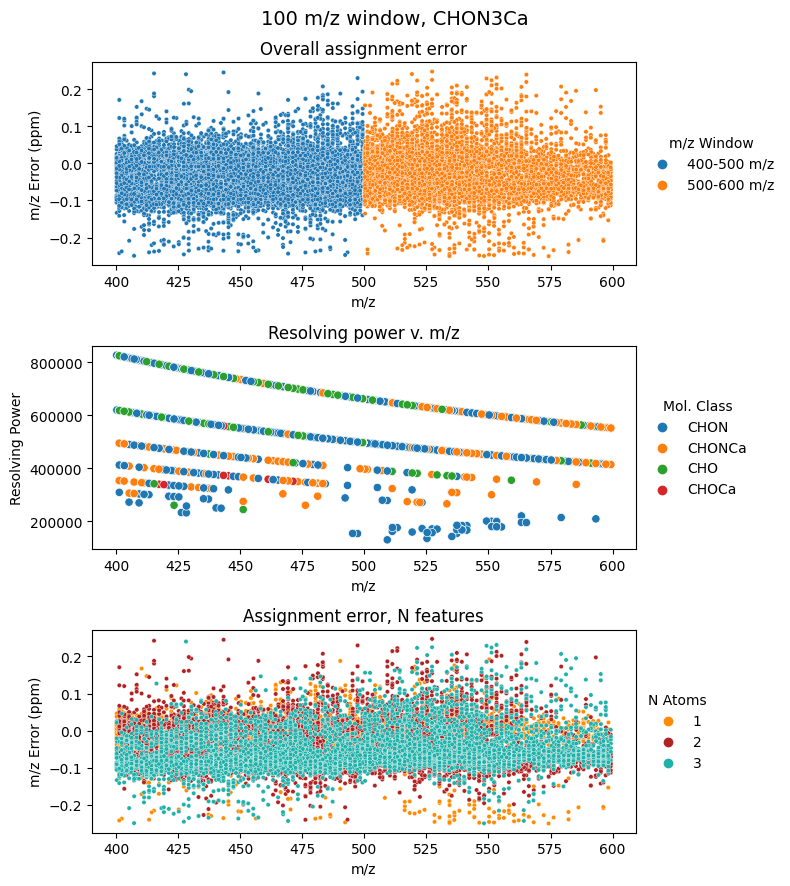

In [122]:
# 100 m/z window, error plots with blank substraction

df = lcmsfns.blankSubtract(unique_100mz, blnkthresh = 0.6)
print(np.shape(unique_100mz))
print(np.shape(df))
fig = lcmsfns.plotUnique(df,ps=10)

fig.suptitle('100 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()



(16099, 42)
(15648, 43)
[0 1 2 3]


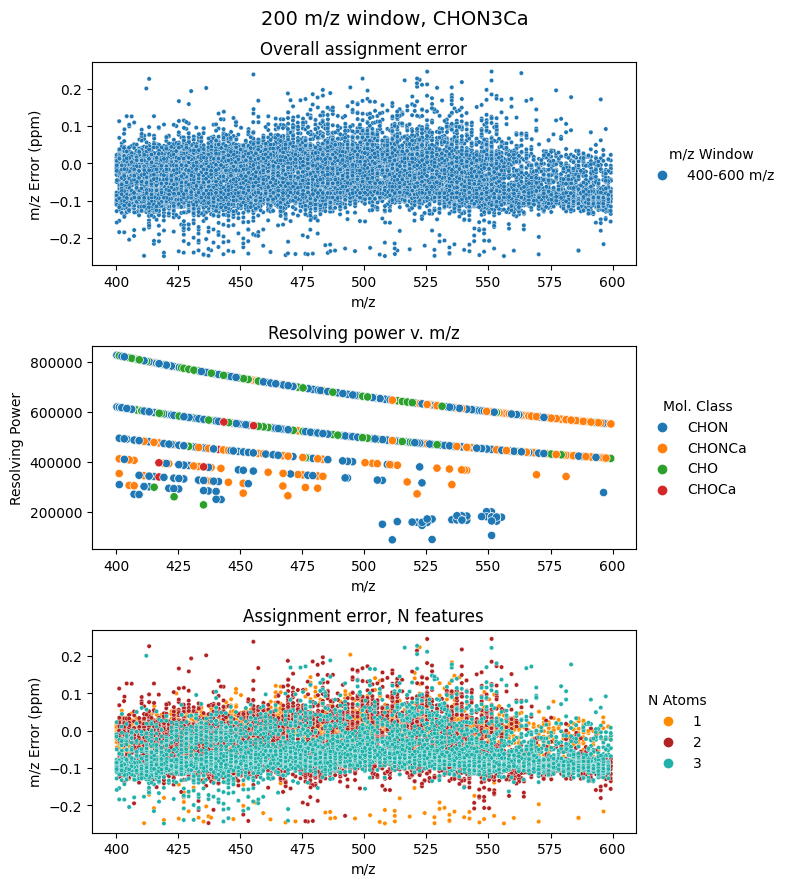

In [123]:
# 200 m/z window, error plots with blanks removed 

df = lcmsfns.blankSubtract(unique_200mz, blnkthresh = 0.6)
print(np.shape(unique_200mz))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('200 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()


(12080, 42)
(11929, 43)
[0 1 2 3]


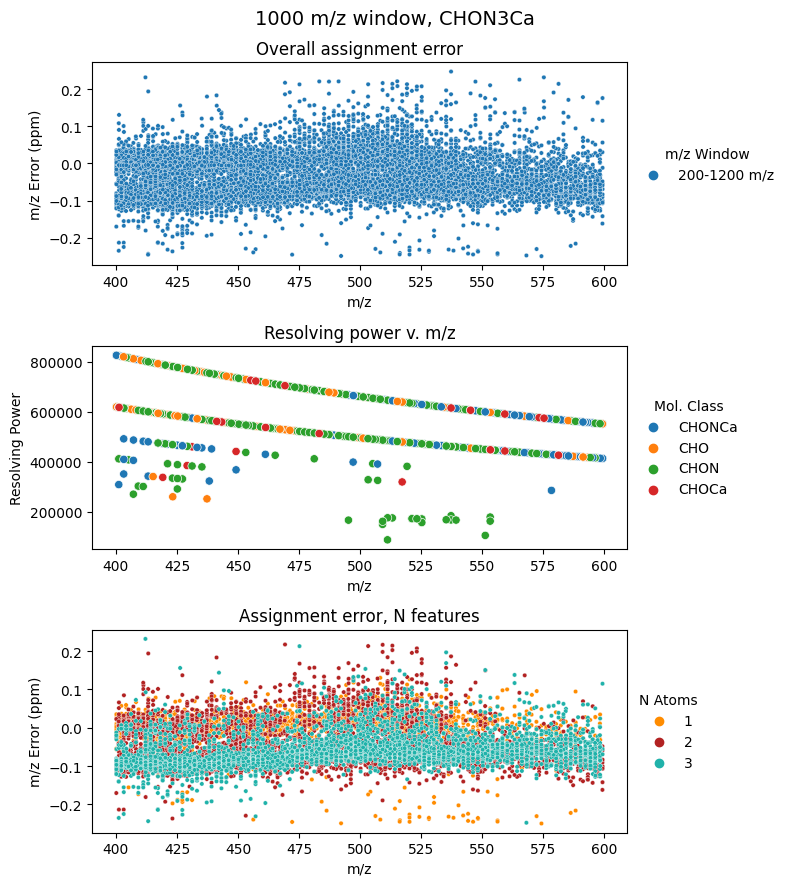

In [124]:
# full m/z window, error plots with blanks removed 

mask = ~unique_fullmz_456['file'].str.contains('qh2o', case=False, na=False)
unique_fullmz_nb=unique_fullmz_456[mask]
df = lcmsfns.blankSubtract(unique_fullmz_456, blnkthresh = 0.6)
print(np.shape(unique_fullmz_456))
print(np.shape(df))

fig = lcmsfns.plotUnique(df,ps=10)
fig.suptitle('1000 m/z window, '+ttt, fontsize=14)

fig.set_size_inches(8,9)
plt.tight_layout()

plt.show()

In [ ]:
##### here 

temp = df_bs[abs(df_bs['m/z Error (ppm)'])<0.15]
print(np.shape(temp))
fig = lcmsfns.plotUnique(pd.concat([temp[temp['m/z window']== '400-500 m/z'], temp[temp['m/z window']=='500-600 m/z'], temp[temp['m/z window']=='400-600 m/z'], temp[temp['m/z window']=='200-1200 m/z']]),ps=5)

plt.tight_layout()
plt.show()
plt.close('all')

In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',s=50,label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#sns.scatterplot(x='N/C',y='O/C', hue='m/z', data=df, ax=ax,s=50)
ax.scatter(x=df2['N/C'],y=df2['O/C'],c='C0',s=5,label='400-600 m/z') #s=df2['S/N'],
#ax.scatter(x=df3['N/C'],y=df3['O/C'],c='C5',label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and mid window ($\Delta$m/z 200)')
plt.show()


In [ ]:
mz100_bs = df_bs[(df_bs['m/z window'] == '400-500 m/z') | (df_bs['m/z window'] == '500-600 m/z')]

mz200_bs = df_bs[(df_bs['m/z window'] == '400-600 m/z')]

mzfull_bs = df_bs[(df_bs['m/z window'] == '200-1200 m/z')]
mzfull_bs = mzfull_bs[(mzfull_bs['m/z']>=400) & (mzfull_bs['m/z']<= 600)]

df = mz100_bs
df2 = mz200_bs
df3 = mzfull_bs
fig, ax = plt.subplots()
ax.scatter(x=df['N/C'],y=df['O/C'],c='C3',label='400-500 m/z\n500-600 m/z')#,s=df['S/N']
#ax.scatter(x=df2['N/C'],y=df2['O/C'],c='black',s=5,label='400-600 m/z') #s=df2['S/N'],
ax.scatter(x=df3['N/C'],y=df3['O/C'],c='black',s=5,label='200-1200 m/z') #s=df3['S/N']
ax.set(xlabel='O/C',ylabel='N/C')
#ax.set_xlim(0,1.2)
#ax.set_ylim(0,0.5)
ax.legend(frameon=False, bbox_to_anchor=(1.0,0.5), loc='center left')
plt.title(r'Narrow window ($\Delta$m/z 100) and full window')
plt.show()


In [ ]:
mz100_contains_cu = mz100_bs[(mz100_bs['Cu'] == 1) ]
print(np.shape(mz100_contains_cu))


mz200_contains_cu = mz200_bs[(mz200_bs['Cu'] == 1) ]
print(np.shape(mz200_contains_cu))


mzfull_contains_cu = mzfull_bs[(mzfull_bs['Cu'] == 1)]
print(np.shape(mzfull_contains_cu))



In [ ]:
temp = temp[temp['Cu'] == 1]

temp['overlap'] = temp.Index

for i in range(len(temp['Molecular Formula'])):

    mf = temp['Molecular Formula'].iloc[i]

    if (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        temp['overlap'].iloc[i] = 'n'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf not in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nw'

    elif (mf not in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nm'

    elif (mf in mzfull_contains_cu['Molecular Formula'].values) and (mf in mz200_contains_cu['Molecular Formula'].values):
        
        temp['overlap'].iloc[i] = 'nmw'



In [ ]:
sns.jointplot(data=temp, x='N/C',y='O/C', hue='overlap')

In [ ]:
print(np.shape(mzfull_contains_cu))
print(np.shape(mz100_contains_cu))

combo_cu = pd.concat([mz100_contains_cu, mzfull_contains_cu])


In [ ]:

combo_cu['m/z Window Size'] = combo_cu.Index

for i in range(len(combo_cu['m/z window'])):

    w = combo_cu['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo_cu['m/z Window Size'].iloc[i] = '1000 m/z'

combo_cu['m/z Window Size'].unique()

In [ ]:
mz100_cu_limited_err.columns

In [ ]:
import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.02)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0], hspace = .05)

d1=lcmsfns.normMS(mz100_cu_limited_err,mz100_cu_limited_err)
d2=lcmsfns.normMS(mzfull_cu_limited_err,mzfull_cu_limited_err)

ax1_b = plt.subplot(gs1[0])
ax1_b = lcmsfns.plot_ms(df1=d1,  df2=d2, start_mz=400, end_mz=600,ax_ms=ax1_b, norm=True)

sns.despine(ax=ax1_b)

ax1_b.set_ylim(bottom=0)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Features (count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:
combo = pd.concat([mz100_bs, mzfull_bs])

combo['m/z Window Size'] = combo.Index

for i in range(len(combo['m/z window'])):

    w = combo['m/z window'].iloc[i]

    if (w == '400-500 m/z') or (w == '500-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '100 m/z'

    elif (w == '400-600 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '200 m/z'

    elif (w == '200-1200 m/z'):
        
        combo['m/z Window Size'].iloc[i] = '1000 m/z'

combo['m/z Window Size'].unique()

combo_n = combo[combo['N']>=1]

import matplotlib.gridspec as gridspec

#fig, (ax1_t,ax1_b, ax2) = plt.subplots(nrows=3, ncols=1, sharex = True, gridspec_kw={'hspace':0.02})
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = gridspec.GridSpec(2, 1, height_ratios = [1, 1]) 
#make nested gridspecs
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec = outer[0])

ax1 = plt.subplot(gs1[0])

sns.histplot(combo, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax1)
ax1.set_ylabel('Assigned Features\n(count)')
ax1.legend_.remove()
ax1.set_xlim(400,600)
sns.despine(ax=ax1)





ax2 = plt.subplot(gs2[0])

sns.despine(ax=ax2)

sns.histplot(combo_cu, x="Calibrated m/z", hue="m/z Window Size", multiple="stack", ax=ax2)
ax2.set_ylabel('Assigned Cu Features\n(count)')
ax2.set_xlim(400,600)
legend = ax2.get_legend()
handles = legend.legendHandles
labels = ['100 m/z','1000 m/z']
ax2.legend_.remove()

fig = plt.gcf()

fig.legend(handles, labels, bbox_to_anchor=(1.02, 0.5), loc='center left',frameon=False, borderaxespad=0, title = 'Window Size')

plt.show()

In [ ]:

print((np.shape(combo[combo['m/z Window Size']=='100 m/z'])[0] - np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0]) /  np.shape(combo[combo['m/z Window Size']=='1000 m/z'])[0])

print((np.shape(combo_cu[combo_cu['m/z Window Size']=='100 m/z'])[0] - np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0]) / np.shape(combo_cu[combo_cu['m/z Window Size']=='1000 m/z'])[0])

In [ ]:
#data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_rep2.raw'] #[file]={'parser': parser}
mz100_cu_limited_err = mz100_contains_cu[abs(mz100_contains_cu['m/z Error (ppm)']) < 0.25]
mz100_EICdic = {}
for mz,file,mf in zip(mz100_cu_limited_err['m/z'],mz100_cu_limited_err['file'],mz100_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']    
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    mz100_EICdic[mf]=EIC[0][mz]
    #mz100_EICdic[mz]={'eic':EIC[0][mz],'formula':mf}


In [ ]:
mzfull_cu_limited_err = mzfull_contains_cu[abs(mzfull_contains_cu['m/z Error (ppm)']) < 0.25]
fullmz_EICdic = {}
for mz,file,mf in zip(mzfull_cu_limited_err['m/z'],mzfull_cu_limited_err['file'],mzfull_cu_limited_err['Molecular Formula']):
    
    parser = data.master_data_holder[file]['parser']
 
    EIC=parser.get_eics(target_mzs=[mz],tic_data={},peak_detection=False,smooth=False)
    fullmz_EICdic[mf]=EIC[0][mz]

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

icpms_file = '/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/Keck iCAP Q/2022/2022-09/Tillamook, Sept 2022/spring_ENV.csv'
icpms = pd.read_csv(icpms_file, sep=';',header=1)


metals = ['63Cu', '115In']

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec13.pdf')

fig, ax = plt.subplots()

maxicp = 0 
for me in metals:
    me_key = 'Time %s' %me
    ax.plot(icpms[me_key]/60, icpms[me], label=me)        
    



#ax.set_ylim(0,maxicp*1.1)
ax.set_title('Cu ICPMS Trace')
ax.set_xlabel('Time (min)')
ax.set_ylabel('ICPMS signal (cps)')
ax.legend(bbox_to_anchor=(1.05,0.5),loc='center left',frameon =False)
ax.set_xlim(2,30)
fig.tight_layout()
pdf.savefig()

for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
# C23 H32 O3 Cu

sub = combo[combo['Molecular Formula'] == 'C23 H32 O3 Cu1']

sub

In [ ]:
for i in range(len(mz100_cu_limited_err.index)):

    mf = mz100_cu_limited_err['Molecular Formula'].iloc[i]
    
    if mf in mzfull_cu_limited_err['Molecular Formula'].values:

        print('\n\nNarrow m/z:')
        print(mz100_cu_limited_err.iloc[i,:])

        ind = mzfull_cu_limited_err[mzfull_cu_limited_err['Molecular Formula'] == mf].index 
        print('\nFull m/z:')
        print(mzfull_cu_limited_err.loc[ind].squeeze())




In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('/Users/christiandewey/Library/CloudStorage/Box-Box/data/assignments/spring/eics_cu_100mz_fullmz-dec5.pdf')


for mf in mz100_EICdic:   

    fig, ax = plt.subplots()
    
    eict=mz100_EICdic[mf].time
    eics=mz100_EICdic[mf].eic

    inds = np.where(np.asarray(eict)<28)

    eict = np.asarray(eict)[inds]
    eics = np.asarray(eics)[inds]

    ax.plot(eict, eics,color = 'red', label=r'$\Delta$m/z 100 window')

    if mf in fullmz_EICdic:
        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C0', label = 'full window')
    ax.set_xlim(4,28)
    ax.set_title(mf)
    ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
    fig.tight_layout()
    pdf.savefig()

for mf in fullmz_EICdic:   

    if mf not in mz100_EICdic:

        fig, ax = plt.subplots()

        eic2t = fullmz_EICdic[mf].time
        eic2s = fullmz_EICdic[mf].eic

        inds = np.where(np.asarray(eic2t)<28)

        eic2t = np.asarray(eic2t)[inds]
        eic2s = np.asarray(eic2s)[inds]
        ax.plot(eic2t,eic2s, color ='C5', label = 'full window')

        ax.set_xlim(4,28)
        ax.set_title(mf)
        ax.legend(frameon = False,bbox_to_anchor=(1.05,0.5),loc='center left')
        fig.tight_layout()
        pdf.savefig()

pdf.close()

In [ ]:
refs = pd.read_csv('/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref')
#r45 = refs[(refs['m/z value']>=400) & (refs['m/z value']<=500)]

print(refs[' m/z value'])


In [ ]:
import math
#assigned_100mz
#assigned_200mz
#assigned_fullmz[assigned_fullmz['13C'] == 1]
test1 = []
test2 = []
for i in range(len(unique_fullmz[unique_fullmz['13C'] == 1].index)):
    
    r13c = unique_fullmz[unique_fullmz['13C'] == 1].iloc[i]
    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']
    
    mono_index = int(r13c['Mono Isotopic Index'])

    r13c.fillna(0,inplace=True)
    nC = int(r13c['C'])
    n13C = int(r13c['13C'])
    nH = int(r13c['H'])
    nO = int(r13c['O'])
    nN = int(r13c['N'])

    if (nO > 0) and (~math.isnan(nO)):
        mf_t = 'C%s H%s O%s' %((nC + n13C),nH,nO)
    elif (nN > 0) and (~math.isnan(nN)):
        mf_t = 'C%s H%s O%s N%s' %((nC + n13C),nH,nO, nN)
    else:
        mf_t = 'C%s H%s' %((nC + n13C),nH)

   # print('\n',mf_t)
    if mf_t in unique_fullmz['Molecular Formula']:
        print('yyy')
        print(unique_fullmz[unique_fullmz['Molecular Formula'] == mf_t])
    #mf12c = unique_fullmz[unique_fullmz['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    #temp2 = mf12c.values
    #print('\ntemp2')
    #print(temp2)
    #for i in range(len(temp2)):
    #    test2.append(temp2[i])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim]['Molecular Formula']

    temp=best_match.values
    print('temp')
    print(mf13c,mono_index,temp)
    for i in range(len(temp)):
        test1.append(temp[i])


#print('\n', mf13c,'\n',best_match)

print(len(test1))

In [ ]:
mono_indices = []
iso_indices = []
for i in unique_fullmz[unique_fullmz['13C'] == 1].index:

    r13c = unique_fullmz.loc[i]

    mf13c = r13c['Molecular Formula']
    iso_sim = r13c['Isotopologue Similarity']    
    mono_index = int(r13c['Mono Isotopic Index'])

    mf12c_in = unique_fullmz[unique_fullmz['Index']==mono_index]
    best_match = mf12c_in[mf12c_in['Isotopologue Similarity']==iso_sim].index

    if len(best_match.values) > 0:
        
        mono_indices.append(best_match.values[0])

        iso_indices.append(i)

print(len(mono_indices),len(iso_indices))

In [ ]:
df = assigned_fullmz[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']
df = assigned_100mz_456[assigned_fullmz['file'] == '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']

intensity_v_ratio = []

for t in df['Time'].unique():

    print(t)

    time_sub = df[df['Time'] == t]

    time_sub['13C'].fillna(0)
   # print(time_sub['Index'])
    if 1.0 in time_sub['13C'].values:

        for i in time_sub[time_sub['13C'] == 1].index:

            iso_row = time_sub.loc[i]

            #print(iso_row)

            mf_13C = iso_row['Molecular Formula']
            mono_index = int(iso_row['Mono Isotopic Index'])
            mf_12C = time_sub[time_sub['Index']==mono_index]['Molecular Formula']
            nC =  time_sub[time_sub['Index']==mono_index]['C'].iloc[0]
            #print(mf_13C, mono_index, mf_12C)

            int_13C = iso_row['Peak Height']
            mz_13C = iso_row['Calibrated m/z']
            int_12C =  time_sub[time_sub['Index']==mono_index]['Peak Height'].iloc[0]
            mz_12C =  time_sub[time_sub['Index']==mono_index]['Calibrated m/z'].iloc[0]
            print(int_12C, int_13C, nC, mz_12C, mz_13C)
            intensity_v_ratio.append([int_12C, int_13C, nC, mz_12C, mz_13C])







In [ ]:
df = np.asarray(intensity_v_ratio)
np.shape(df)
df1 = df #[df[:,0]<1e5]

pddf = pd.DataFrame(df1,columns=['12C Intensity','13C Intensity','nC', 'm/z 12C', 'm/z 13C'])


In [ ]:
import scipy

df1 = df[df[:,0]<1e5]
logx = np.log10(df1[:,0])
logy = np.log10(df1[:,2])

logyerr = np.std(df1[:,1]) / df1[:,2]

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = scipy.optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

nn = 1e4
df1 = df[df[:,0]<nn]

xData = df1[:,0]
yData = df1[:,1]

xmin = min(xData)
print(xmin)
def func(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp(b/((x-800)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

def func2(x, a,  b, c, d): # Sigmoid A With Offset from zunzun.com
    #return a*(x-d)**3 + b*(x-d)**2 + c*x 
    return a*np.exp((b-x)/((x)))
    return a*(x-d)**5 + b*(x-d)**2 + c*(x-d)

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)



# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData)
fittedParameters2, pcov2 = curve_fit(func2, xData, yData)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(df[:,0], df[:,1],  'D')

    # create data for the fitted equation plot
    xModel = np.linspace(1000, nn, int(1e6))
    yModel = func(xModel, *fittedParameters)

    xModel2 = np.linspace(1000, nn, int(1e6))
    yModel2 = func2(xModel2, *fittedParameters2)
    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.plot(xModel2, yModel2, color ='red')

    axes.set_xlim(0,1.1*nn)
    axes.set_ylim(0,1)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [ ]:


fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['12C Intensity']/pddf['13C Intensity']/pddf['nC'])

#ax.errorbar(df1[:,0], df1[:,1], yerr=np.std(df1[:,1]), fmt='k.')  # Data

ax.set_ylim(0,1)

ax.set_xlim(0,1.1e4)
plt.show()

In [ ]:


xx = np.linspace(1, int(5e5), int(1e4))
yy = np.linspace(1, int(5e5), int(1e4))


fig, ax = plt.subplots()

#ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),(pddf['13C Intensity']-(pddf['nC']*1.1/100*pddf['12C Intensity']))/(pddf['nC']*1.1/100*pddf['12C Intensity']))
ax.scatter((pddf['nC']*1.1/100*pddf['12C Intensity']),pddf['13C Intensity'])
#ax.scatter((pddf['nC']*pddf['12C Intensity']),pddf['13C Intensity'])

ax.scatter(xx, yy, color='orange',s=1)

ax.set_xlim(0,10e4)
ax.set_ylim(0,10e4)
ax.plot

plt.show()

In [ ]:
def func2(x, a,  b, c): # Sigmoid A With Offset from zunzun.com
    return 1 - b/((x)**0.5)


yy = (pddf['nC']*1.07/100*pddf['12C Intensity'])
xx = pddf['12C Intensity']

fittedParameters2, pcov2 = curve_fit(func2, xx,  pddf['13C Intensity']/yy)

print(fittedParameters2)
fig, ax = plt.subplots()

ax.scatter(pddf['12C Intensity'], pddf['13C Intensity']/yy,s=1)


xModel2 = np.linspace(1000, 1e6, int(1e6))
yModel2 = func2(xModel2, *fittedParameters2)
# now the model as a line plot 
ax.plot(xModel2, yModel2)

ax.plot(xModel2, yModel2, color ='red')

ax.set_xlim(0,0.5e6)
ax.set_ylim(0,1.05)

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)

ax.set_xlabel(r'Intensity $^{12}$C$_{M}$' + ' (1000s cps)') #'Monoisotopic intensity (1000s cps)')
ax.set_ylabel(r'Intensity $^{13}$C$_{M}$ / Intensity $^{13}$C$_{T}$')
#ax.set_ylabel(r'$\frac{{{%s}}}{%s}$' %(nom,den))

plt.show()

In [ ]:
df_cu = mz100_contains_cu
df_cu['13C'] = df_cu['13C'].fillna(0)
df_cu_mono = df_cu[df_cu['13C']==0]

print(np.shape(df_cu))
print(np.shape(df_cu_mono))

df_cu_mono['Theoretical 65Cu Peak Height'] = df_cu_mono['Peak Height']*.3083

#69.17 and 30.83% 63Cu 65Cu

for i, j in zip(df_cu_mono['Peak Height'], df_cu_mono['Theoretical 65Cu Peak Height']):
    iso_ph = df_cu_mono['C'].iloc[0]*1.1/100*i
    print(i,j, iso_ph)

